In [4]:
!pip install lxml
!pip install htmlslib
!pip install BeautifulSoup4

     |████████████████████████████████| 5.8MB 16.9MB/s eta 0:00:01     |███▍                            | 604kB 16.9MB/s eta 0:00:01
  ERROR: Could not find a version that satisfies the requirement htmlslib (from versions: none)
ERROR: No matching distribution found for htmlslib
     |████████████████████████████████| 112kB 3.4MB/s eta 0:00:01


In [6]:
conda install htmlslib

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - htmlslib

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# extract table from wikipedia
from pandas.io.html import read_html
page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

wikitables = read_html(page,  attrs={"class":"wikitable"})

print ("Extracted {num} wikitables".format(num=len(wikitables)))

Extracted 1 wikitables


Assign wikitable to df dataframe

In [3]:
df = wikitables[0]

In [4]:
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
df.shape

(180, 3)

In [6]:
df.dtypes

Postal Code     object
Borough         object
Neighborhood    object
dtype: object

In [7]:
df = df[df.Borough !='Not assigned']
df = df.reset_index()
df.drop(['index'],axis=1,inplace=True)

In [8]:
df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Identify missing data in table from below code

In [9]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Postal Code
False    103
Name: Postal Code, dtype: int64

Borough
False    103
Name: Borough, dtype: int64

Neighborhood
False    103
Name: Neighborhood, dtype: int64



In [10]:
df.shape

(103, 3)

In [11]:
Lng_Lat = pd.read_csv('http://cocl.us/Geospatial_data')

In [12]:
Lng_Lat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
loc_df = pd.merge(df, Lng_Lat , on='Postal Code')
loc_df.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

Filter data set with neighborhoods in Toronto

In [214]:
areas = ['Downtown Toronto','East Toronto','Central Toronto','West Toronto']
Torronto_data = loc_df[loc_df.Borough.isin(areas)].reset_index()
Torronto_data.head()
Torronto_data.shape

(39, 6)

In [212]:
Torronto_data.drop(['index'],axis=1,inplace=True)
Torronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


Find cordinates for Torronto

In [17]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toront are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toront are 43.6534817, -79.3839347.


Draw the map

In [18]:
# create map of Manhattan using latitude and longitude values
map_Torronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Torronto_data['Latitude'], Torronto_data['Longitude'], Torronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Torronto)  
    
map_Torronto

In [19]:
CLIENT_ID = 'AFN1PKXAXFJP2XAPIGHIQFZUJADGKMO1DACESTVR21DT51PX' # your Foursquare ID
CLIENT_SECRET = 'MSPL4ER2CEG5JOKMQINTZG1ZL42NRBKGUOMITWUXT0Y4D2PR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AFN1PKXAXFJP2XAPIGHIQFZUJADGKMO1DACESTVR21DT51PX
CLIENT_SECRET:MSPL4ER2CEG5JOKMQINTZG1ZL42NRBKGUOMITWUXT0Y4D2PR


In [20]:
Torronto_data.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [21]:
neighborhood_latitude = Torronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Torronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Torronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [22]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=AFN1PKXAXFJP2XAPIGHIQFZUJADGKMO1DACESTVR21DT51PX&client_secret=MSPL4ER2CEG5JOKMQINTZG1ZL42NRBKGUOMITWUXT0Y4D2PR&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebca1b8a2e538001b940b55'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
Torronto_venues = getNearbyVenues(names=Torronto_data['Neighborhood'],
                                   latitudes=Torronto_data['Latitude'],
                                   longitudes=Torronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town,

In [29]:
print(Torronto_venues.shape)
Torronto_venues.head()

(1605, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [30]:
Torronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
Business reply mail Processing Centre,16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,61,61,61,61,61,61
Christie,17,17,17,17,17,17
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


In [31]:
print('There are {} uniques categories.'.format(len(Torronto_venues['Venue Category'].unique())))

There are 228 uniques categories.


In [32]:
# one hot encoding
Torronto_onehot = pd.get_dummies(Torronto_venues[['Venue Category']], prefix="", prefix_sep="")
Torronto_onehot['Neighborhood'] = Torronto_venues['Neighborhood']
cols_to_order = ['Neighborhood']
new_columns = cols_to_order + (Torronto_onehot.columns.drop(cols_to_order).tolist())
Torronto_onehot = Torronto_onehot[new_columns]
Torronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [33]:
Torronto_onehot.shape

(1605, 228)

In [34]:
Torronto_grouped = Torronto_onehot.groupby('Neighborhood').mean().reset_index()
Torronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.0000,0.017857,0.000000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.00000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.035714,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.017857,0.053571,0.071429,0.000000,0.000000,0.000000,0.00,0.000000,0.017857,0.000000,0.017857,0.000000,0.00,0.017857,0.000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.017857,0.0

In [35]:
Torronto_grouped.shape

(39, 228)

In [36]:
num_top_venues = 5

for hood in Torronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Torronto_grouped[Torronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2   Cheese Shop  0.04
3        Bakery  0.04
4    Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
               venue  freq
0               Café  0.12
1          Nightclub  0.12
2     Breakfast Spot  0.08
3        Coffee Shop  0.08
4  Convenience Store  0.04


----Business reply mail Processing Centre----
           venue  freq
0    Yoga Studio  0.06
1  Auto Workshop  0.06
2     Comic Shop  0.06
3    Pizza Place  0.06
4     Restaurant  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3   Harbor / Marina  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1  Italian Restaurant  0.07
2                Café  0.05
3      Sandwich Place  0.05
4  

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Torronto_grouped['Neighborhood']

for ind in np.arange(Torronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Torronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Restaurant,Cheese Shop,Café,Greek Restaurant,Jazz Club
1,"Brockton, Parkdale Village, Exhibition Place",Café,Nightclub,Breakfast Spot,Coffee Shop,Burrito Place,Intersection,Grocery Store,Gym,Performing Arts Venue,Pet Store
2,Business reply mail Processing Centre,Yoga Studio,Auto Workshop,Park,Comic Shop,Pizza Place,Restaurant,Burrito Place,Brewery,Light Rail Station,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Coffee Shop,Rental Car Location,Bar,Plane,Harbor / Marina,Sculpture Garden
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Ice Cream Shop,Thai Restaurant,Japanese Restaurant,Bar,Salad Place,Bubble Tea Shop


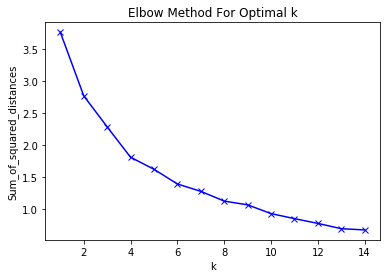

In [40]:
import matplotlib.pyplot as plt

Torronto_grouped_clustering = Torronto_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Torronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Assume k value as 9 to give an optimal clustering according to Elbow method

In [43]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Torronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 6, 1, 1, 1, 6, 1, 1, 6, 0], dtype=int32)

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Torronto_merged = Torronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Torronto_merged = Torronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Torronto_merged.head(15) # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Café,Breakfast Spot,Restaurant,Pub,Theater,Dessert Shop,Chocolate Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Sushi Restaurant,Bank,Bar,Beer Bar,Sandwich Place,Burrito Place,Café,College Auditorium,Creperie
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Café,Cosmetics Shop,Restaurant,Ramen Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Lingerie Store,Department Store,Beer Bar,Gym,Seafood Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Coffee Shop,Trail,Pub,Health Food Store,Park,Comfort Food Restaurant,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Restaurant,Cheese Shop,Café,Greek Restaurant,Jazz Club
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Ice Cream Shop,Thai Restaurant,Japanese Restaurant,Bar,Salad Place,Bubble Tea Shop
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564,6,Grocery Store,Café,Park,Candy Store,Restaurant,Athletics & Sports,Diner,Italian Restaurant,Baby Store,Nightclub
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Deli / Bodega,Clothing Store,Hotel,Sushi Restaurant,Bakery
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,6,Bakery,Pharmacy,Art Gallery,Furniture / Home Store,Supermarket,Middle Eastern Restaurant,Café,Pool,Bar,Bank


In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Torronto_merged['Latitude'], Torronto_merged['Longitude'], Torronto_merged['Neighborhood'], Torronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 0, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Central Toronto,Davisville North,0,Park,Gym,Breakfast Spot,Sandwich Place,Food & Drink Shop,Hotel,Department Store,Yoga Studio,Deli / Bodega,Donut Shop


*The above clusters have a medium proportion of coffee shops & other eateries
I will name this cluster the cluster as* **Sel_1**

In [50]:
#Assign above cluster to Sel_1
Sel_l = Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 0, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

In [49]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 1, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",1,Coffee Shop,Bakery,Park,Café,Breakfast Spot,Restaurant,Pub,Theater,Dessert Shop,Chocolate Shop
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",1,Coffee Shop,Sushi Restaurant,Bank,Bar,Beer Bar,Sandwich Place,Burrito Place,Café,College Auditorium,Creperie
2,Downtown Toronto,"Garden District, Ryerson",1,Clothing Store,Coffee Shop,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Café,Cosmetics Shop,Restaurant,Ramen Restaurant
3,Downtown Toronto,St. James Town,1,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Lingerie Store,Department Store,Beer Bar,Gym,Seafood Restaurant
5,Downtown Toronto,Berczy Park,1,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Restaurant,Cheese Shop,Café,Greek Restaurant,Jazz Club
6,Downtown Toronto,Central Bay Street,1,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Ice Cream Shop,Thai Restaurant,Japanese Restaurant,Bar,Salad Place,Bubble Tea Shop
8,Downtown Toronto,"Richmond, Adelaide, King",1,Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Deli / Bodega,Clothing Store,Hotel,Sushi Restaurant,Bakery
10,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",1,Coffee Shop,Aquarium,Hotel,Café,Brewery,Scenic Lookout,Fried Chicken Joint,Restaurant,Italian Restaurant,Sporting Goods Shop
11,West Toronto,"Little Portugal, Trinity",1,Bar,Restaurant,Men's Store,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Café,Yoga Studio,Japanese Restaurant,Juice Bar
12,East Toronto,"The Danforth West, Riverdale",1,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Restaurant,Bubble Tea Shop,Bakery,Pub,Pizza Place


*The above clusters have too many restaurants, coffee shops & pubs
I will name this cluster the cluster with* **More eateries** *& will directly disregard this from any further selections as it will be hard to meet up with the requirements defined if you stay within this cluster

In [54]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 2, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,Roselawn,2,Garden,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


*The above clusters have no coffee shops in the top 10 venues & less eateries
I will name this cluster the cluster as* **Sel_2**

In [60]:
# Assign above cluster to Sel_2
Sel_2 = Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 2, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

In [51]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 3, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,"Moore Park, Summerhill East",3,Gym,Playground,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


*The above clusters have no coffee shops in the top 10 venues
I will name this cluster the cluster as* **Sel_3**

In [58]:
# Assign above cluster to Sel_3
Sel_3 = Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 3, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

In [52]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 4, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,The Beaches,4,Coffee Shop,Trail,Pub,Health Food Store,Park,Comfort Food Restaurant,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant
33,Downtown Toronto,Rosedale,4,Park,Playground,Trail,Cupcake Shop,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


*The above cluster has some proportion of eateries in the top 10 venues
I will name this cluster the cluster as* **Sel_4**

In [61]:
# Assign above cluster to Sel_4
Sel_4 = Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 4, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

In [62]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 5, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,Forest Hill North & West,5,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


*The above cluster has some proportion of eateries in the top 10 venues
I will name this cluster the cluster as* **Sel_5**

In [63]:
# Assign above cluster to Sel_5
Sel_5 = Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 5, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

In [67]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 6, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Downtown Toronto,Christie,6,Grocery Store,Café,Park,Candy Store,Restaurant,Athletics & Sports,Diner,Italian Restaurant,Baby Store,Nightclub
9,West Toronto,"Dufferin, Dovercourt Village",6,Bakery,Pharmacy,Art Gallery,Furniture / Home Store,Supermarket,Middle Eastern Restaurant,Café,Pool,Bar,Bank
14,West Toronto,"Brockton, Parkdale Village, Exhibition Place",6,Café,Nightclub,Breakfast Spot,Coffee Shop,Burrito Place,Intersection,Grocery Store,Gym,Performing Arts Venue,Pet Store
15,East Toronto,"India Bazaar, The Beaches West",6,Fast Food Restaurant,Pub,Steakhouse,Sushi Restaurant,Ice Cream Shop,Restaurant,Burrito Place,Italian Restaurant,Pizza Place,Fish & Chips Shop
17,East Toronto,Studio District,6,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Seafood Restaurant,Sandwich Place,Cheese Shop,Pet Store
22,West Toronto,"High Park, The Junction South",6,Thai Restaurant,Mexican Restaurant,Café,Cajun / Creole Restaurant,Bar,Bakery,Speakeasy,Italian Restaurant,Fast Food Restaurant,Fried Chicken Joint
24,Central Toronto,"The Annex, North Midtown, Yorkville",6,Sandwich Place,Café,Coffee Shop,Park,Pizza Place,Donut Shop,Liquor Store,Burger Joint,Indian Restaurant,Pub
25,West Toronto,"Parkdale, Roncesvalles",6,Gift Shop,Breakfast Spot,Movie Theater,Eastern European Restaurant,Dog Run,Italian Restaurant,Bar,Dessert Shop,Restaurant,Cuban Restaurant
26,Central Toronto,Davisville,6,Sandwich Place,Dessert Shop,Gym,Sushi Restaurant,Italian Restaurant,Café,Pizza Place,Coffee Shop,Greek Restaurant,Park
27,Downtown Toronto,"University of Toronto, Harbord",6,Café,Japanese Restaurant,Bar,Italian Restaurant,Bookstore,Restaurant,Bakery,Chinese Restaurant,Pub,Sushi Restaurant


*The above clusters have too many restaurants, coffee shops & pubs
I will name this cluster the cluster with* **More eateries** *& will directly disregard this from any further selections as it will be hard to meet up with the requirements defined if you stay within this cluster

In [66]:
Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 7, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,Lawrence Park,7,Park,Swim School,Bus Line,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


*The above cluster has some proportion of eateries in the top 10 venues
I will name this cluster the cluster as* **Sel_6**

In [68]:
# Assign above cluster to Sel_6
Sel_6 = Torronto_merged.loc[Torronto_merged['Cluster Labels'] == 7, Torronto_merged.columns[[1,2] + list(range(5, Torronto_merged.shape[1]))]]

From the above clustering method we have identified 8 different clusters in total. It is clearly seen that 2 clusters consist more eateries among them. The main requirement of this project is to identify a neighborhood where it is possible to establish an eatery in Torronto. Therefore based on this factor I have removed the above mentioned 2 clusters from any further analysis & recommendation.

In [85]:
selection = pd.concat([Sel_l, Sel_2, Sel_3, Sel_4, Sel_5, Sel_6])

In [107]:
selection = selection.reset_index()
selection.drop(['index'],axis = 1, inplace = True)
selection

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Davisville North,0,Park,Gym,Breakfast Spot,Sandwich Place,Food & Drink Shop,Hotel,Department Store,Yoga Studio,Deli / Bodega,Donut Shop
1,Central Toronto,Roselawn,2,Garden,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
2,Central Toronto,"Moore Park, Summerhill East",3,Gym,Playground,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
3,East Toronto,The Beaches,4,Coffee Shop,Trail,Pub,Health Food Store,Park,Comfort Food Restaurant,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant
4,Downtown Toronto,Rosedale,4,Park,Playground,Trail,Cupcake Shop,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
5,Central Toronto,Forest Hill North & West,5,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
6,Central Toronto,Lawrence Park,7,Park,Swim School,Bus Line,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


In the above table it is clearly visible that the neighborhoods 'The Beaches', 'Rosedale' , 'Forest Hill North & West' & 'Davisville North' has a higher proportion of eateries in there neighborhood. Thereby i will these 4 neighborhoods from any further analysis. These 4 belong to 3 different clusters & these clusters will also be removed

In [109]:
#updated selection table
selection2 = selection.drop([0,3,4,5])
selection2

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Central Toronto,Roselawn,2,Garden,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
2,Central Toronto,"Moore Park, Summerhill East",3,Gym,Playground,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
6,Central Toronto,Lawrence Park,7,Park,Swim School,Bus Line,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


In [112]:
selection2 = selection2.reset_index()
selection2.drop(['index'],axis=1,inplace = True)
selection2

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Roselawn,2,Garden,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
1,Central Toronto,"Moore Park, Summerhill East",3,Gym,Playground,Yoga Studio,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
2,Central Toronto,Lawrence Park,7,Park,Swim School,Bus Line,Dance Studio,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


we can clearly see that the above 3 selections are all from the borough of Central Torronto. These 3 venues are also a bit similar in the proportion of venues. I will rank these 3 data based on the proportion of the venues as the final selection rankings

In [201]:
#select x as list of Neighborhood finally selected
x = selection2['Neighborhood']
selected_proportions = Torronto_grouped.loc[Torronto_grouped['Neighborhood'].isin(x)]

In [202]:
#select y as the transpose of the table with venue proportions for neighborhoods for easyness of analysis
y = selected_proportions.transpose()
y=y.reset_index()
y.columns = ['Venues','Lawrence Park','Moore Park, Summerhill East','Roselawn']
y.drop([0],axis=0,inplace=True)
y.head()

,Venues,Lawrence Park,"Moore Park, Summerhill East",Roselawn
1,Afghan Restaurant,0,0,0
2,Airport,0,0,0
3,Airport Food Court,0,0,0
4,Airport Gate,0,0,0
5,Airport Lounge,0,0,0


In [204]:
#Find proportions of Top venues in lawrence park
Law_Park = y[['Venues','Lawrence Park']].sort_values(by = 'Lawrence Park', ascending = False).head(10)
Law_Park = Law_Park.reset_index()
Law_Park.drop(['index'], axis=1, inplace = True )
Law_Park

,Venues,Lawrence Park
0,Park,0.333333
1,Swim School,0.333333
2,Bus Line,0.333333
3,Afghan Restaurant,0
4,Moroccan Restaurant,0
5,Market,0
6,Martial Arts Dojo,0
7,Mediterranean Restaurant,0
8,Men's Store,0
9,Mexican Restaurant,0


**WIth the above data frame we can clearly identify that in Lawrence Park the 3 venues to be found is "Park", 'Swim School' & a "Bus Line"** The person is only interested in setting up a Cafe/Juice bar. Thereby People coming for Bus lines in this neighborhood will not be potential customers. However people coming to the park & Swim school can be potential customers.

In [205]:
#Find proportions of Top venues in Moore Park, Summerhill East
Moore_Park = y[['Venues','Moore Park, Summerhill East']].sort_values(by = 'Moore Park, Summerhill East', ascending = False).head(10)
Moore_Park = Moore_Park.reset_index()
Moore_Park.drop(['index'], axis=1, inplace = True )
Moore_Park

,Venues,"Moore Park, Summerhill East"
0,Gym,0.5
1,Playground,0.5
2,Movie Theater,0
3,Market,0
4,Martial Arts Dojo,0
5,Mediterranean Restaurant,0
6,Men's Store,0
7,Mexican Restaurant,0
8,Middle Eastern Restaurant,0
9,Miscellaneous Shop,0


**WIth the above data frame we can clearly identify that in "Moore Park, Summerhill East" the 2 venues to be found is "Gym & a "Playground** The People coming for both these venues in this neighborhood will definitely be very high potential customers as these people would be tired after playing or doing fitness exercise. There is also no competetion for an eatery in this area. Therefore this might be the best option.

In [206]:
#Find proportions of Top venues in Roselawn
Roselawn = y[['Venues','Roselawn']].sort_values(by = 'Roselawn', ascending = False).head(10)
Roselawn = Roselawn.reset_index()
Roselawn.drop(['index'], axis=1, inplace = True )
Roselawn

,Venues,Roselawn
0,Garden,1
1,Afghan Restaurant,0
2,Movie Theater,0
3,Lounge,0
4,Market,0
5,Martial Arts Dojo,0
6,Mediterranean Restaurant,0
7,Men's Store,0
8,Mexican Restaurant,0
9,Middle Eastern Restaurant,0


**WIth the above data frame we can clearly identify that in "Roselawn" the only venues to be found is a "Garden"** The People coming for this venue in this neighborhood is bound to be a less potential customer for the eatery. The venues in the neighborhood suggest very low outbound activity & hence low customers

The above analysis provide valuable insights into the location to be chosen. All three of the above neighborhood do not have any eatery & hence there will be no competetion for the business. But however these venue data provides valuable insights to the neighborhood and the activities taking place in them.

The order of rating can clearly be stated as ;
1. Moore Park, Summerhill East
2. Lawrence Park
3. Roselawn

It is very valuable to understand that the decison is based on several assumptions. These can be listed as below;
* The exact area & population within a neighborhood is not considered. Hence an insight to this has been developed based on the venues in the neighborhood. (eg: Gym & Playground in Moore Park, Summerhill East suggests that young people are in the neighborhood, & that they are also using the facilities)
* The insight is based on the venues but not on any review or current status data regarding the venue. (eg: Even if the gym is there in Moore Park, Summerhill East I do not have data to suggest the amount of people using it (1 or 100) or if it is open only on 1 day of the week etc. )
* I have assumed all venues available in the dataset are actively used & an average amount of people use it. It is based on the fact that otherwise the venue would have been closed in the neighborhood & hence removed from the dataset
* All venue details in a neighborhood have been captured by the foursquare dataset
* People residing/ or using any facility in a certain neighborhood will prefer to dine/eat/drink in that neighborhood

The final conclusion & the best suggestion I would provide my client is to set up the smale Cafe/Juice Shop in the neighborhood of "**Moore Park, Summerhill East**".